In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## lightGBM

import lightgbm as lgb
import pandas as pd
import numpy as np
# XGBoost
!pip install xgboost

df=pd.read_csv('/content/drive/MyDrive/EBAC_Capstone/Leenay_all.csv')

In [3]:
df

,X,Fraction_Insertions,Avg_Insertion_Length,Avg_Deletion_Length,Indel_Diversity,Fraction_Frameshifts,ID
0,CTGCAGGGCTAGTTTCCTATAGG,0.069572,2.097587,4.301844,3.536538,0.807375,GuideSeq 1
1,GAGATGCGGACCACCCAGCTGGG,0.287647,1.042802,10.814444,3.871165,0.665696,GuideSeq 2
2,GCAAACGGAAGTGCAATTGTCGG,0.137004,1.116505,9.888889,3.931298,0.684823,GuideSeq 3
3,GTCATCGCTGAGTTGAGGAAGGG,0.093889,1.654088,4.527812,3.523067,0.753003,GuideSeq 4
4,ATATGATTATCCCTGCACAAGGG,0.526525,1.045430,6.415644,2.828101,0.887214,GuideSeq 5
...,...,...,...,...,...,...,...
1516,ATGCCCGACCAAAGACAACCAGG,0.093236,1.766402,3.641787,3.170302,0.684801,GuideSeq 1517
1517,CACGCTGTCATCCACCAGGTAGG,0.069054,1.394578,7.661831,4.284711,0.639433,GuideSeq 1518
1518,GGGCTCCAGAGTCTGATACAGGG,0.421439,1.002213,7.364856,3.175859,0.832975,GuideSeq 1519
1519,AAAGACTTCGGTCCTCTAGTAGG,0.206277,1.058724,7.907886,3.782588,0.528375,GuideSeq 1520


In [4]:
df['X']

0       CTGCAGGGCTAGTTTCCTATAGG
1       GAGATGCGGACCACCCAGCTGGG
2       GCAAACGGAAGTGCAATTGTCGG
3       GTCATCGCTGAGTTGAGGAAGGG
4       ATATGATTATCCCTGCACAAGGG
                 ...           
1516    ATGCCCGACCAAAGACAACCAGG
1517    CACGCTGTCATCCACCAGGTAGG
1518    GGGCTCCAGAGTCTGATACAGGG
1519    AAAGACTTCGGTCCTCTAGTAGG
1520    TCGTCGCCCAGTGTCCAAGTGGG
Name: X, Length: 1521, dtype: object

In [5]:

# Import all required from scikit-learn
# Pre processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

# Estimators
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Model Search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

#  Other Model Search Libs
#from skopt import BayesSearchCV # Base lib name is scikit-optimize

# Model Report Card
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Make sample data using scikit learn
from sklearn.datasets import make_blobs
from scipy.stats import spearmanr

# Others on top of Scikit Learn
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [6]:
df.shape

(1521, 7)

In [7]:
df.size

10647

In [8]:
# Column names
print(f'No of columns = {df.shape[1]}', '\n')
df.columns.tolist()

No of columns = 7 



['X',
 'Fraction_Insertions',
 'Avg_Insertion_Length',
 'Avg_Deletion_Length',
 'Indel_Diversity',
 'Fraction_Frameshifts',
 'ID']

In [9]:
# Any dupicate records
df.duplicated().sum()

0

In [10]:
# Any misisng values in column
df.isnull().sum()

X                       0
Fraction_Insertions     0
Avg_Insertion_Length    0
Avg_Deletion_Length     0
Indel_Diversity         0
Fraction_Frameshifts    0
ID                      0
dtype: int64

In [11]:
# Any misisng values in column (isna is same sas isnull)
df.isna().sum()

X                       0
Fraction_Insertions     0
Avg_Insertion_Length    0
Avg_Deletion_Length     0
Indel_Diversity         0
Fraction_Frameshifts    0
ID                      0
dtype: int64

In [12]:
# Unique values
df.nunique()

X                       1521
Fraction_Insertions     1520
Avg_Insertion_Length    1506
Avg_Deletion_Length     1521
Indel_Diversity         1521
Fraction_Frameshifts    1521
ID                      1521
dtype: int64

In [13]:
# Unique values in %
round((df.nunique() / df.count()), 4) * 100

X                       100.00
Fraction_Insertions      99.93
Avg_Insertion_Length     99.01
Avg_Deletion_Length     100.00
Indel_Diversity         100.00
Fraction_Frameshifts    100.00
ID                      100.00
dtype: float64

In [14]:
# Describe the entire train data frame (it will only describe the numerical columns only)
df.describe()

,Fraction_Insertions,Avg_Insertion_Length,Avg_Deletion_Length,Indel_Diversity,Fraction_Frameshifts
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,0.208742,1.418754,7.461400,3.803834,0.697010
std,0.154053,0.944696,3.039895,0.703009,0.127466
min,0.001168,0.000000,2.110952,0.865452,0.001676
25%,0.088380,1.055097,5.553664,3.373111,0.641359
50%,0.163327,1.172269,7.052886,3.865803,0.715334
75%,0.296047,1.576923,8.771193,4.299745,0.780449
max,0.831198,20.773882,46.027027,5.548348,0.954305


In [15]:
# Another quick way to get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     1521 non-null   object 
 1   Fraction_Insertions   1521 non-null   float64
 2   Avg_Insertion_Length  1521 non-null   float64
 3   Avg_Deletion_Length   1521 non-null   float64
 4   Indel_Diversity       1521 non-null   float64
 5   Fraction_Frameshifts  1521 non-null   float64
 6   ID                    1521 non-null   object 
dtypes: float64(5), object(2)
memory usage: 83.3+ KB


In [16]:
# Remove rows with missing output values
df_data = df.dropna(subset=['Fraction_Insertions', 'Avg_Insertion_Length', 'Avg_Deletion_Length', 'Indel_Diversity', 'Fraction_Frameshifts'])


In [17]:

# Create a mapping of DNA characters to integers
dna_chars = 'ACGT'
char_to_int = dict((c, i) for i, c in enumerate(dna_chars))
num_chars = len(dna_chars)

# row 582 has small characters
# A -> 1,0,0,0
# C -> 0,1,0,0
# G -> 0,0,1,0
# T -> 0,0,0,1

# Function to one-hot encode a DNA sequence
def one_hot_encode_sequence(sequence):
    encoding = np.zeros((len(sequence), num_chars), dtype=int)
    for i, char in enumerate(sequence):
        encoding[i, char_to_int[char.upper()]] = 1
    return encoding

# Apply one-hot encoding to the 'X' column and convert to numpy array
X = np.array([one_hot_encode_sequence(seq) for seq in df_data['X']])
#X = [one_hot_encode_sequence(seq) for seq in df_data['X']]
#X = X.astype(int)
# Convert output (y) columns to numpy arrays
y_cols = ['Fraction_Insertions', 'Avg_Insertion_Length', 'Avg_Deletion_Length', 'Indel_Diversity', 'Fraction_Frameshifts']
#y = ['Fraction_Insertions', 'Avg_Insertion_Length', 'Avg_Deletion_Length', 'Indel_Diversity', 'Fraction_Frameshifts']
y = df_data[y_cols].to_numpy()
#y = y.astype(int)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Function to get the details of numerical_column

def numerical_column_details(data_frame: pd.DataFrame, column_names: list) -> None:
    for col in column_names:
      # Print details
      print(f'Column name = {col}\n\
      Number of unique values = {data_frame[col].nunique()}\n\
      First_10_Sample_Values = {data_frame[col].unique()[:10]}\n\
      Min value = {min(data_frame[col])}\n\
      Max value = {max(data_frame[col])}\n\
      Range = {max(data_frame[col]) - min(data_frame[col])}\n\
      Mean = {data_frame[col].mean()}\n\
      Median = {data_frame[col].median()}\n\
      Mode = {data_frame[col].mode()}\n\
      Variance = {data_frame[col].var()}\n\
      Std Dev = {data_frame[col].std()}', '\n')
      # Plot Histogram
      fig = data_frame[col].hist(bins=50)
      fig.set_title(col + '_Histogram')
      fig.set_xlabel(col)
      fig.set_ylabel('Number of Records')
      plt.show()

Column name = Fraction_Insertions
      Number of unique values = 1520
      First_10_Sample_Values = [0.06957155 0.28764685 0.13700384 0.09388889 0.52652498 0.12941532
 0.40776075 0.44082165 0.04853581 0.1183356 ]
      Min value = 0.00116764
      Max value = 0.831198085
      Range = 0.830030445
      Mean = 0.20874204771860616
      Median = 0.163327058
      Mode = 0    0.041667
Name: Fraction_Insertions, dtype: float64
      Variance = 0.023732177388228068
      Std Dev = 0.15405251503376394 



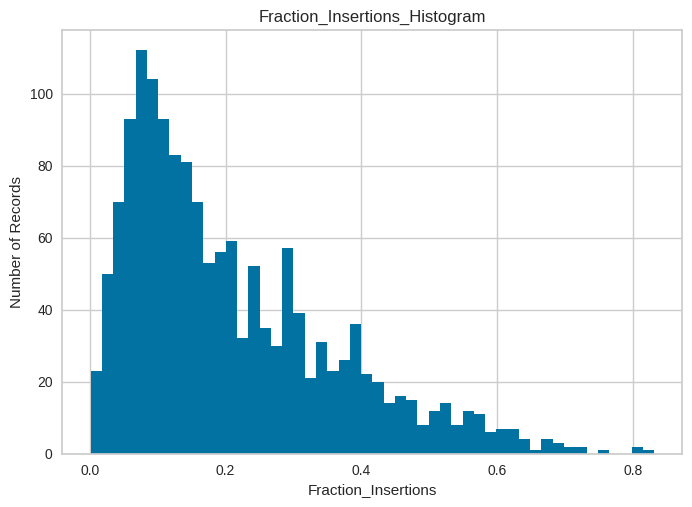

Column name = Avg_Insertion_Length
      Number of unique values = 1506
      First_10_Sample_Values = [2.09758657 1.04280156 1.11650485 1.65408805 1.04542979 1.47055151
 1.01819792 1.03712121 1.73308271 1.70138726]
      Min value = 0.0
      Max value = 20.7738817
      Range = 20.7738817
      Mean = 1.4187540658809992
      Median = 1.172268908
      Mode = 0    1.0
Name: Avg_Insertion_Length, dtype: float64
      Variance = 0.8924500877685387
      Std Dev = 0.9446957646610568 



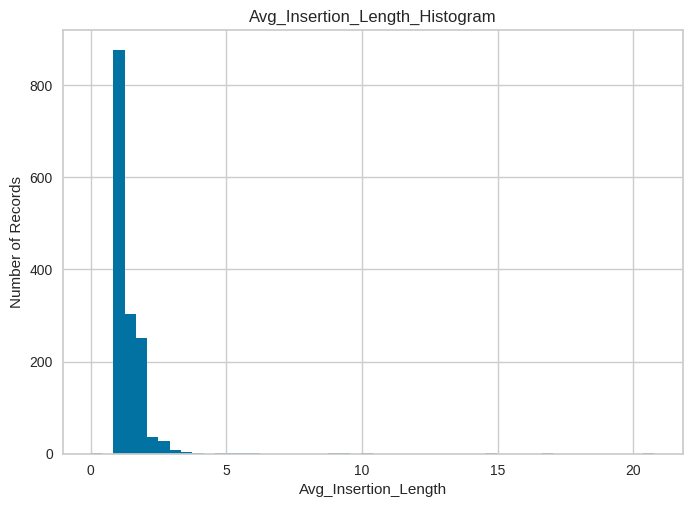

Column name = Avg_Deletion_Length
      Number of unique values = 1521
      First_10_Sample_Values = [ 4.30184404 10.81444386  9.88888889  4.52781211  6.41564363  5.46473741
  7.56563098  9.59151515  4.12430515 10.88921233]
      Min value = 2.110951518
      Max value = 46.02702703
      Range = 43.916075512
      Mean = 7.4613997709664694
      Median = 7.052886121
      Mode = 0        2.110952
1        2.346479
2        2.430394
3        2.498150
4        2.595627
          ...    
1516    27.501096
1517    29.364726
1518    31.632009
1519    31.704573
1520    46.027027
Name: Avg_Deletion_Length, Length: 1521, dtype: float64
      Variance = 9.240960110141211
      Std Dev = 3.039894753135577 



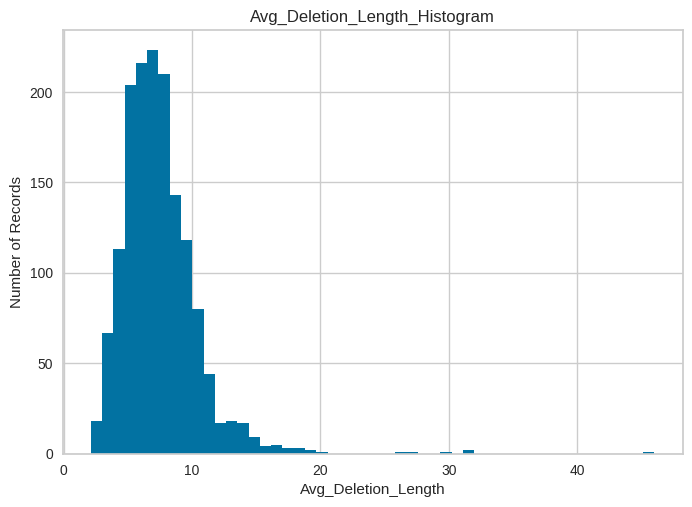

Column name = Indel_Diversity
      Number of unique values = 1521
      First_10_Sample_Values = [3.53653788 3.87116471 3.9312977  3.52306661 2.82810099 4.57305416
 3.56327733 3.28170716 3.67715899 4.62544604]
      Min value = 0.86545228
      Max value = 5.548347734
      Range = 4.6828954540000005
      Mean = 3.803833699739646
      Median = 3.865802918
      Mode = 0       0.865452
1       1.077791
2       1.151684
3       1.290267
4       1.519788
          ...   
1516    5.360632
1517    5.412222
1518    5.432595
1519    5.437249
1520    5.548348
Name: Indel_Diversity, Length: 1521, dtype: float64
      Variance = 0.4942210742348324
      Std Dev = 0.7030085875967892 



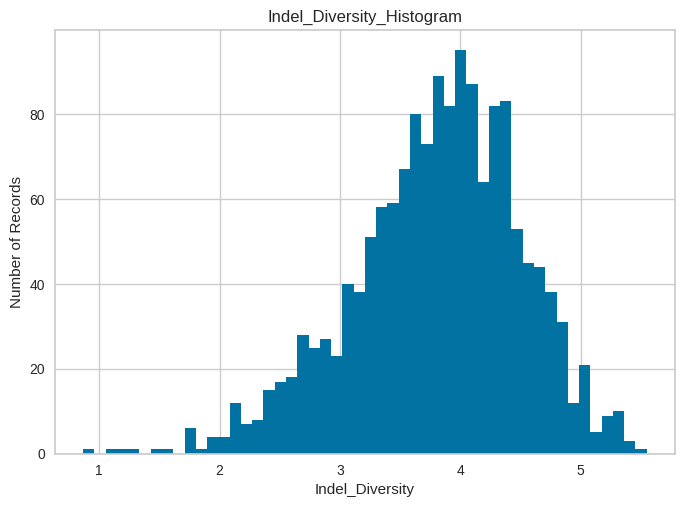

Column name = Fraction_Frameshifts
      Number of unique values = 1521
      First_10_Sample_Values = [0.80737468 0.66569579 0.68482252 0.75300261 0.88721443 0.53815973
 0.71663687 0.72129112 0.75938205 0.63759922]
      Min value = 0.00167641
      Max value = 0.95430482
      Range = 0.9526284100000001
      Mean = 0.6970102468770546
      Median = 0.715334421
      Mode = 0       0.001676
1       0.004541
2       0.014971
3       0.024783
4       0.063313
          ...   
1516    0.924236
1517    0.931205
1518    0.934886
1519    0.940091
1520    0.954305
Name: Fraction_Frameshifts, Length: 1521, dtype: float64
      Variance = 0.016247590655714562
      Std Dev = 0.12746603726371414 



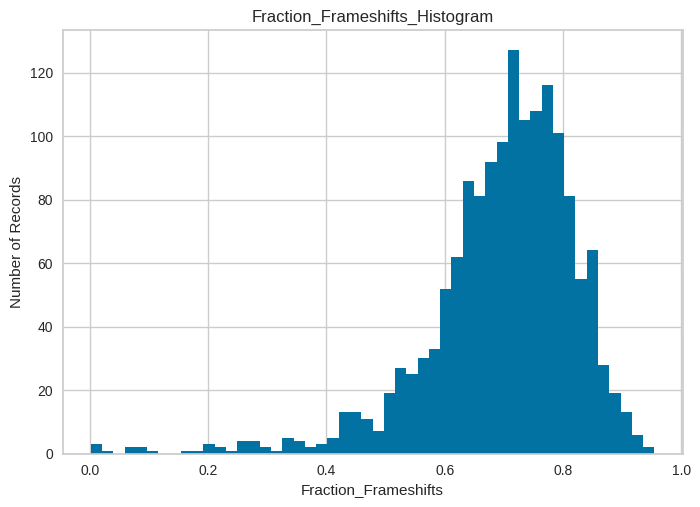

In [19]:
numerical_column_details(data_frame = df_data, column_names = y_cols)

In [20]:
y[:,0]

array([0.06957155, 0.28764685, 0.13700384, ..., 0.42143906, 0.20627727,
       0.28411748])

In [21]:
X = X.reshape(1521,92)
y1  = y[:,0]
print(y1[0:2])

[0.06957155 0.28764685]


In [22]:
# from sklearn.preprocessing import MinMaxScaler
# # Create a MinMaxScaler object for y values
# scaler = MinMaxScaler()

# # Fit the scaler on your y data (e.g., y_train)
# scaler.fit(y1.reshape(-1, 1))  # Reshape to a 2D array

# # Transform the y data
# y1_scaled = scaler.transform(y1.reshape(-1, 1)).reshape(-1)

In [23]:
# print(y1_scaled[0:2])

In [24]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1, test_size=0.20)

In [25]:
print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (1216, 92)
Shape of Xtest: (305, 92)
Shape of ytrain: (1216,)
Shape of ytest: (305,)


In [26]:
X_train.shape

(1216, 92)

In [27]:
xgb_model1 = xgb.XGBRegressor(booster = "dart", max_depth = 1, n_estimators= 20, learning_rate =1.0, max_leaves = 10, )
#xgb_model = xgb.XGBRegressor()

In [28]:
xgb_model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
# Making predictions on the test data
y_pred = xgb_model1.predict(X_test)

In [ ]:
# y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
# y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.01162182657836444


In [32]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.5024099734445283


In [33]:
# Calculate the Spearman rank correlation coefficient
spearman_corr= spearmanr(y_test, y_pred)

# Print the Spearman rank correlation coefficient
print("R-Spearman:", spearman_corr)

R-Spearman: SignificanceResult(statistic=0.7548535892506821, pvalue=1.9159885702516854e-57)


In [109]:
# Assuming 'model' is your trained machine learning model
with open('model1.pkl', 'wb') as file:
    pickle.dump(xgb_model1, file)

In [108]:
# # Assuming 'model' is your trained machine learning model
# model_path = 'C:\\Users\Tam\\xgb_model1.pkl'  # Replace with your desired file path and filename
# print("Before saving")

# with open(model_path, 'wb') as file:
#     pickle.dump(xgb_model1, file)

# print(model_path)

Before saving
C:\Users\Tam\xgb_model1.pkl


### XGBoost

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

- Optimized implementation of Gradient Boosting is known as XGBoost, which stands for Extreme Gradient Boosting.
- It aims at being extremely fast, scalable
and portable

In [74]:
X = X.reshape(1521,92)
y1  = y[:,1]

In [75]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1, test_size=0.20)

In [76]:
print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (1216, 92)
Shape of Xtest: (305, 92)
Shape of ytrain: (1216,)
Shape of ytest: (305,)


In [77]:
xgb_model2 = xgb.XGBRegressor(booster = "dart", max_depth = 4, n_estimators= 60, learning_rate = 1.2, max_leaves = 10, )
#xgb_model = xgb.XGBRegressor()

In [78]:
xgb_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [79]:
# Making predictions on the test data
y_pred = xgb_model2.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.4871018389609865


In [81]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.23496950427138708


In [82]:
m1 = np.median(y1)

y_pred_acc_inserlen= np.where(y_pred > m1, 1, 0)
y_test_acc_inserlen= np.where(y_test > m1, 1, 0)
# Calculate accuracy
accuracy = accuracy_score(y_test_acc_inserlen, y_pred_acc_inserlen)

print("Accuracy:", accuracy)

Accuracy: 0.6032786885245902


In [111]:
# Assuming 'model' is your trained machine learning model
with open('model2.pkl', 'wb') as file:
    pickle.dump(xgb_model2, file)

In [83]:
X = X.reshape(1521,92)
y1  = y[:,2]

In [84]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1, test_size=0.20)

In [85]:
print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (1216, 92)
Shape of Xtest: (305, 92)
Shape of ytrain: (1216,)
Shape of ytest: (305,)


In [86]:
xgb_model3 = xgb.XGBRegressor(booster = "dart", max_depth = 1, n_estimators= 10, learning_rate = 0.2, max_leaves = 20, )
#xgb_model = xgb.XGBRegressor()

In [87]:
xgb_model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=20,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
# Making predictions on the test data
y_pred = xgb_model3.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.061007072892984


In [90]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.0961933517306015


In [91]:
m1 = np.median(y1)

y_pred_acc_inserlen= np.where(y_pred > m1, 1, 0)
y_test_acc_inserlen= np.where(y_test > m1, 1, 0)
# Calculate accuracy
accuracy = accuracy_score(y_test_acc_inserlen, y_pred_acc_inserlen)

print("Accuracy:", accuracy)

Accuracy: 0.5049180327868853


In [112]:
# Assuming 'model' is your trained machine learning model
with open('model3.pkl', 'wb') as file:
    pickle.dump(xgb_model3, file)

In [92]:
X = X.reshape(1521,92)
y1  = y[:,3]

In [93]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1, test_size=0.20)

In [94]:
print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (1216, 92)
Shape of Xtest: (305, 92)
Shape of ytrain: (1216,)
Shape of ytest: (305,)


In [95]:
xgb_model4 = xgb.XGBRegressor(booster = "dart", max_depth = 2, n_estimators= 30, learning_rate = 1.2, max_leaves = 20, )
#xgb_model = xgb.XGBRegressor()

In [96]:
xgb_model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=20,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [97]:
# Making predictions on the test data
y_pred = xgb_model4.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3746129791451997


In [99]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.18844055679913307


In [100]:
m1 = np.median(y1)

y_pred_acc_inserlen= np.where(y_pred > m1, 1, 0)
y_test_acc_inserlen= np.where(y_test > m1, 1, 0)
# Calculate accuracy
accuracy = accuracy_score(y_test_acc_inserlen, y_pred_acc_inserlen)

print("Accuracy:", accuracy)

Accuracy: 0.659016393442623


In [113]:
# Assuming 'model' is your trained machine learning model
with open('model4.pkl', 'wb') as file:
    pickle.dump(xgb_model4, file)

In [101]:
X = X.reshape(1521,92)
y1  = y[:,4]

In [102]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1, test_size=0.20)

In [103]:
print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (1216, 92)
Shape of Xtest: (305, 92)
Shape of ytrain: (1216,)
Shape of ytest: (305,)


In [104]:
xgb_model5 = xgb.XGBRegressor(booster = "dart", max_depth = 2, n_estimators= 30, learning_rate = 1.2, max_leaves = 20, )
#xgb_model = xgb.XGBRegressor()

In [105]:
xgb_model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=20,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
# Making predictions on the test data
y_pred = xgb_model5.predict(X_test)

In [107]:
# Define a function to map values to categories
def categorize_array(arr):
    categories = np.where(arr > 0.6, 'high', np.where(arr >= 0.4, 'medium', 'low'))
    return categories

y_pred_frame= categorize_array(y_pred)
y_test_frame= categorize_array(y_test)
# Calculate accuracy
accuracy = accuracy_score(y_test_frame, y_pred_frame)
print("Accuracy:", accuracy)

Accuracy: 0.7377049180327869


In [114]:
# Assuming 'model' is your trained machine learning model
with open('model5.pkl', 'wb') as file:
    pickle.dump(xgb_model5, file)

In [68]:
c_matrix = confusion_matrix(y_test_frame, y_pred_frame)
c_matrix

array([[215,   0,  34],
       [  5,   0,   1],
       [ 40,   0,  10]])

In [69]:
# Assuming 'model' is your trained machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [70]:
# Assuming 'model' is your trained machine learning model
model_path = 'C:\\Users\Tam\\xgb_model.pkl'  # Replace with your desired file path and filename
print("Before saving")

with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)

print(model_path)

Before saving
C:\Users\Tam\xgb_model.pkl


In [71]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [72]:
print("Before saving")
with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)
print("After saving")

Before saving
After saving


In [73]:
# # save model in a pickle format .pkl
# import pickle
# pickle_out = open("/content/gdrive/MyDrive/EBAC_Capstone/xgb_model.pkl","wb")
# pickle.dump(xgb_model, pickle_out)
# pickle_out.close()